In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import scipy.special as sp

In [3]:
# simulating the problem to get a probability estimate

n =24

pos = [1]

options = [1,2]



def random_walk(n):
  pos_copy = pos.copy()

  for i in range(n):
    if pos_copy[i] == 25:
      break
    else:
      x = np.random.choice(options)
      pos_copy.append(x+pos_copy[i])

  return pos_copy



def count_reach_25(trials, n):
    count = 0
    for _ in range(trials):
        walk = random_walk(n)
        if 25 in walk:
            count += 1
    return count

# Run some simulations and count how many times we reach 25
trials = 1000
result = count_reach_25(trials, n)

print(f"Out of {trials} walks, we hit 25 a total of {result} times giving an estimated probability of {result/trials}")















Out of 1000 walks, we hit 25 a total of 647 times giving an estimated probability of 0.647


In [4]:
# iteration method of finding p(n), I know this gives correct values so can use as a checker

def iterate_sequence(p1, p2, n):
    sequence = [p1, p2]
    for i in range(2, n + 1):
        p_next = 0.5 * sequence[i - 1] + 0.5 * sequence[i - 2]
        sequence.append(p_next)
    return sequence

p1 = 1
p2 = 1/2
n = 60  # Number of terms to compute
result = iterate_sequence(p1, p2, n)
print(result)
print("For n = 25 the probability is", result[24])
print("For n = 61 the probability is", result[60])

[1, 0.5, 0.75, 0.625, 0.6875, 0.65625, 0.671875, 0.6640625, 0.66796875, 0.666015625, 0.6669921875, 0.66650390625, 0.666748046875, 0.6666259765625, 0.66668701171875, 0.666656494140625, 0.6666717529296875, 0.6666641235351562, 0.6666679382324219, 0.6666660308837891, 0.6666669845581055, 0.6666665077209473, 0.6666667461395264, 0.6666666269302368, 0.6666666865348816, 0.6666666567325592, 0.6666666716337204, 0.6666666641831398, 0.6666666679084301, 0.666666666045785, 0.6666666669771075, 0.6666666665114462, 0.6666666667442769, 0.6666666666278616, 0.6666666666860692, 0.6666666666569654, 0.6666666666715173, 0.6666666666642413, 0.6666666666678793, 0.6666666666660603, 0.6666666666669698, 0.6666666666665151, 0.6666666666667425, 0.6666666666666288, 0.6666666666666856, 0.6666666666666572, 0.6666666666666714, 0.6666666666666643, 0.6666666666666679, 0.6666666666666661, 0.666666666666667, 0.6666666666666665, 0.6666666666666667, 0.6666666666666666, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667

In [5]:
# calulate p(n) where n = 2k+1 using the formula I derived in attack phase

from fractions import Fraction
n = 99
def nCr(n,r):
  return sp.comb(n,r, exact = True)

def p(n):
 k = int((n-1)/2)
 return sum((1/2**(k+i))*nCr(k+i,k-i) for i in range(k+1))
decimal_value = p(n)
fraction_value = Fraction(decimal_value)
print(f"p({n})=", fraction_value)

print(f"p({n})=", p(n))
print(11184811/16777216)

p(99)= 6004799503160661/9007199254740992
p(99)= 0.6666666666666666
0.6666666865348816


In [75]:
# checking my formula
n = 61
def check(n):
 count = 0
 for i in range(1,n+1,2):

   if p(i) == iterate_sequence(1,1/2,i)[i-1]:
     count += 1


 if count == int((n+1)/2):
   return True
 else:
   return False

print(check(n))
print("p(61)=",p(61))
print("For n = 61 the probability is", result[60])


False
p(61)= 0.6666666666666666
For n = 61 the probability is 0.6666666666666667


In [6]:
# edits to iterative function to improve accuracy for large n

from fractions import Fraction

def iterate_sequence_imp(p1, p2, n):
    sequence = [Fraction(p1), Fraction(p2)]  # Store exact fractions
    for i in range(2, n + 1):
        p_next = Fraction(1, 2) * sequence[i - 1] + Fraction(1, 2) * sequence[i - 2]
        sequence.append(p_next)
    return sequence

# Test with fractions
p1 = 1
p2 = Fraction(1, 2)
n = 60
result = iterate_sequence_imp(p1, p2, n)

# Convert last value to decimal for comparison
#print(float(result[98]))
#print(result[98])
print(result)
print(result[60])
print(float(result[60]))

[Fraction(1, 1), Fraction(1, 2), Fraction(3, 4), Fraction(5, 8), Fraction(11, 16), Fraction(21, 32), Fraction(43, 64), Fraction(85, 128), Fraction(171, 256), Fraction(341, 512), Fraction(683, 1024), Fraction(1365, 2048), Fraction(2731, 4096), Fraction(5461, 8192), Fraction(10923, 16384), Fraction(21845, 32768), Fraction(43691, 65536), Fraction(87381, 131072), Fraction(174763, 262144), Fraction(349525, 524288), Fraction(699051, 1048576), Fraction(1398101, 2097152), Fraction(2796203, 4194304), Fraction(5592405, 8388608), Fraction(11184811, 16777216), Fraction(22369621, 33554432), Fraction(44739243, 67108864), Fraction(89478485, 134217728), Fraction(178956971, 268435456), Fraction(357913941, 536870912), Fraction(715827883, 1073741824), Fraction(1431655765, 2147483648), Fraction(2863311531, 4294967296), Fraction(5726623061, 8589934592), Fraction(11453246123, 17179869184), Fraction(22906492245, 34359738368), Fraction(45812984491, 68719476736), Fraction(91625968981, 137438953472), Fraction(1

In [64]:
n = 58
def check_imp(n):
 count = 0
 for i in range(1,n+1,2):

   if p(i) == float(iterate_sequence_imp(1,1/2,i)[i-1]):
     count += 1


 if count == int((n+1)/2):
   return True
 else:
   return False

print(check_imp(n))
print("p(61)=",p(61))
print("For n = 61 the probability is", result[60], float(result[60]) )

False
p(61)= 0.6666666666666666
For n = 61 the probability is 768614336404564651/1152921504606846976 0.6666666666666666


In [77]:

from fractions import Fraction
n = 25

def imp_p(n):
 k = int((n-1)/2)
 return sum(Fraction(1,2**(k+i))*nCr(k+i,k-i) for i in range(k+1))
decimal_value = p(n)
fraction_value = Fraction(decimal_value)
print(f"p({n})=", fraction_value)

print(f"p({n})=", p(n))
print(11184811/16777216)

p(25)= 11184811/16777216
p(25)= 0.6666666865348816
0.6666666865348816


In [8]:
#my formula for even n attempt 1, works

n=18

def even_p(n):
 k = int(n/2)
 return sum((1/2**(k+i))*nCr(k+i,k-1-i) for i in range(k))
decimal_value = even_p(n)
fraction_value = Fraction(decimal_value)
print(f"p({n})=", fraction_value)

print(f"p({n})=", even_p(n))
print(result[n-1])


p(18)= 87381/131072
p(18)= 0.6666641235351562
87381/131072


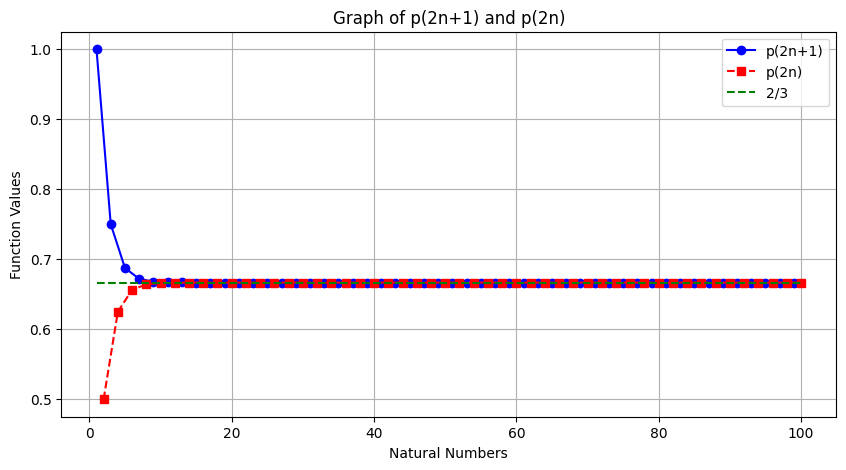

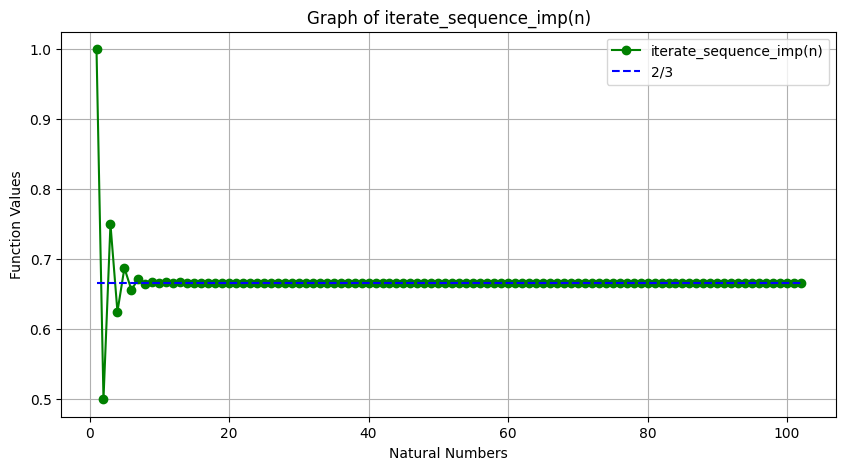

In [19]:
# code creating graphs showing behaviour of p(n) for odd and even n

n = 101
x_values = np.arange(1,n)
x_odd = np.arange(1, n, 2)
x_even = np.arange(2, n, 2)


p_values = [p(n) for n in x_odd]
even_p_values = [even_p(n) for n in x_even]
limit = [2/3 for i in range(len(x_values))]

plt.figure(figsize=(10, 5))
plt.plot(x_odd, p_values, marker='o', linestyle='-', label="p(2n+1)", color="blue")
plt.plot(x_even, even_p_values, marker='s', linestyle='--', label="p(2n)", color="red")
plt.plot(x_values,limit, linestyle = '--',label = "2/3",color='green')


plt.xlabel("Natural Numbers")
plt.ylabel("Function Values")
plt.title("Graph of p(2n+1) and p(2n)")
plt.legend()
plt.grid()


plt.show()

sequence_values = iterate_sequence_imp(p1, p2, n)
x_values = np.arange(1, n + 2)  # Natural numbers from 1 to n
y_values = [float(val) for val in sequence_values]  # Convert fractions to float for plotting
limit = [2/3 for i in range(len(x_values))]

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values,marker ='o', linestyle='-', color="green", label="iterate_sequence_imp(n)")
plt.plot(x_values,limit , linestyle = '--',label = "2/3",color='blue')

plt.xlabel("Natural Numbers")
plt.ylabel("Function Values")
plt.title("Graph of iterate_sequence_imp(n)")


plt.legend()
plt.grid()


plt.show()

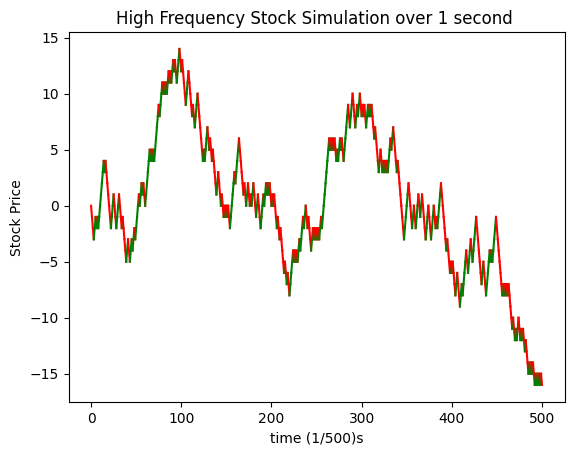

In [84]:
# extension looking at coin =[-1,1] to simulate a stocks movement at high freq

n = 500
options = [-1,1]
pos = [0]
def random_walk_ext(n):
  pos_copy = pos.copy()
  for i in range(n):
    x = np.random.choice(options)
    pos_copy.append(x+pos_copy[i])

  return pos_copy


x_val = range(0,n+1)
y_val = random_walk_ext(n)

#positive_mask = y_val >= 0
#negative_mask = y_val < 0
for i in range(len(y_val) - 1):
    color = 'green' if y_val[i+1] > y_val[i] else 'red'  # Green if going up, Red if going down
    plt.plot(x_val[i:i+2], y_val[i:i+2], color=color,)

#plt.plot(x_val,y_val, label ='NVDA after earnings', color = 'green')
# plt.legend()
plt.xlabel('time (1/500)s')
plt.ylabel('Stock Price')
plt.title('High Frequency Stock Simulation over 1 second ')

plt.show()